In [2]:
from convokit import Corpus, download


In [3]:
corpus = Corpus(filename=download("movie-corpus"))

In [32]:
import pandas as pd
conversations_df = pd.read_csv('conversations.csv')
conversations_df

,movie_idx,movie_name,release_year,rating,votes,genre
0,m0,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']"
1,m1,1492: conquest of paradise,1992,6.2,10421,"['adventure', 'biography', 'drama', 'history']"
2,m2,15 minutes,2001,6.1,25854,"['action', 'crime', 'drama', 'thriller']"
3,m3,2001: a space odyssey,1968,8.4,163227,"['adventure', 'mystery', 'sci-fi']"
4,m4,48 hrs.,1982,6.9,22289,"['action', 'comedy', 'crime', 'drama', 'thrill..."
...,...,...,...,...,...,...
612,m612,watchmen,2009,7.8,135229,"['action', 'crime', 'fantasy', 'mystery', 'sci..."
613,m613,xxx,2002,5.6,53505,"['action', 'adventure', 'crime']"
614,m614,x-men,2000,7.4,122149,"['action', 'sci-fi']"
615,m615,young frankenstein,1974,8.0,57618,"['comedy', 'sci-fi']"


In [5]:
corpus_df = pd.read_csv('corpus.csv')
corpus_df

,movie_id,url
0,m0,http://www.dailyscript.com/scripts/10Things.html
1,m1,http://www.hundland.org/scripts/1492-ConquestO...
2,m2,http://www.dailyscript.com/scripts/15minutes.html
3,m3,http://www.scifiscripts.com/scripts/2001.txt
4,m4,http://www.awesomefilm.com/script/48hours.txt
...,...,...
612,m612,http://www.scifiscripts.com/scripts/wtchmn.txt
613,m613,http://www.dailyscript.com/scripts/xXx.txt
614,m614,http://www.scifiscripts.com/scripts/xmenthing.txt
615,m615,http://www.horrorlair.com/scripts/young.txt


In [6]:
index_df = pd.read_csv('index.csv')
index_df

,utterances-index_movie_id_0,utterances-index_parsed_0,speakers-index_character_name_0,speakers-index_movie_idx_0,speakers-index_movie_name_0,speakers-index_gender_0,speakers-index_credit_pos_0,conversations-index_movie_idx_0,conversations-index_movie_name_0,conversations-index_release_year_0,conversations-index_rating_0,conversations-index_votes_0,conversations-index_genre_0,overall-index_url_0,overall-index_name_0
0,<class 'str'>,<class 'list'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'dict'>,<class 'str'>


In [89]:
speakers_df = pd.read_csv('speakers.csv')
speakers_df

,speaker_id,character_name,movie_idx,movie_name,gender,credit_pos
0,u0,BIANCA,m0,10 things i hate about you,f,4
1,u2,CAMERON,m0,10 things i hate about you,m,3
2,u3,CHASTITY,m0,10 things i hate about you,?,?
3,u4,JOEY,m0,10 things i hate about you,m,6
4,u5,KAT,m0,10 things i hate about you,f,2
...,...,...,...,...,...,...
9030,u9029,CREALOCK,m616,zulu dawn,?,?
9031,u9033,STUART SMITH,m616,zulu dawn,?,?
9032,u9028,COGHILL,m616,zulu dawn,?,?
9033,u9031,MELVILL,m616,zulu dawn,?,?


In [8]:
utterances_df = pd.read_csv('utterances.csv')
utterances_df

,id,conversation_id,text,speaker
0,L1045,L1044,They do not!,u0
1,L1044,L1044,They do to!,u2
2,L985,L984,I hope so.,u0
3,L984,L984,She okay?,u2
4,L925,L924,Let's go.,u0
...,...,...,...,...
304708,L666371,L666369,Lord Chelmsford seems to want me to stay back ...,u9030
304709,L666370,L666369,I'm to take the Sikali with the main column to...,u9034
304710,L666369,L666369,"Your orders, Mr Vereker?",u9030
304711,L666257,L666256,"Good ones, yes, Mr Vereker. Gentlemen who can ...",u9030


## EDA

looking at box office ratings, year of release, number of votes

- describe
- plots: barplats, scatterplots, graphs
- explore the dataset and show how certain factors change over time


## summary stats


In [34]:
conversations_df.dtypes

movie_idx        object
movie_name       object
release_year    float64
rating          float64
votes             int64
genre            object
dtype: object

In [56]:
conversations_df['release_year'] = pd.to_numeric(conversations_df['release_year'], errors="ignore")

In [57]:
conversations_df = conversations_df.dropna()
conversations_df.shape

(602, 6)

In [58]:
num_vars = ['release_year',	'rating', 'votes']
conversations_df[num_vars].describe()

,release_year,rating,votes
count,602.000000,602.000000,602.000000
mean,1988.348837,6.870266,50144.398671
std,16.664984,1.220661,62204.237611
min,1927.000000,2.500000,9.000000
25%,1984.000000,6.200000,10024.250000
50%,1994.000000,7.050000,27121.500000
75%,1999.000000,7.800000,67108.000000
max,2010.000000,9.300000,419312.000000


In [66]:
conversations_df[num_vars].corr()

,release_year,rating,votes
release_year,1.000000,-0.298515,0.095515
rating,-0.298515,1.000000,0.518089
votes,0.095515,0.518089,1.000000


no noticeable correlations between variables

- release year and rating have a weak negative correlation
- votes and release year have barely have a positive linear correlation
- rating and votes have a medium positive linear relationship with each other


## looking for outliers


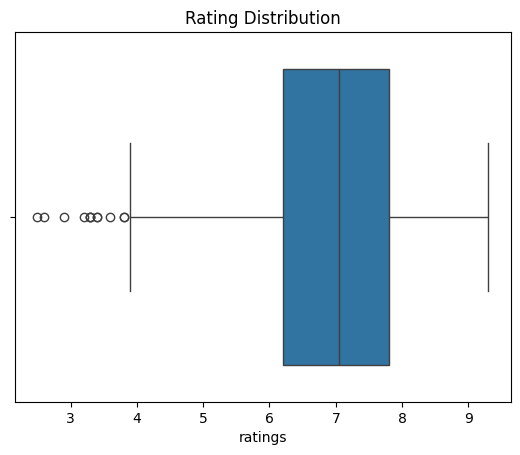

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.boxplot(x=conversations_df['rating'])
plt.title("Rating Distribution")
plt.xlabel("ratings")
plt.show()

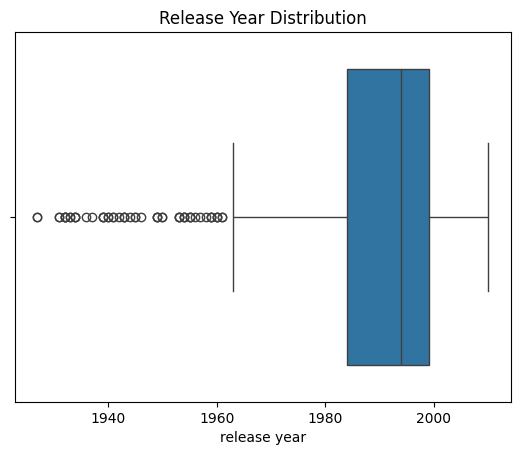

In [64]:
sns.boxplot(x=conversations_df['release_year'])
plt.title("Release Year Distribution")
plt.xlabel("release year")
plt.show()

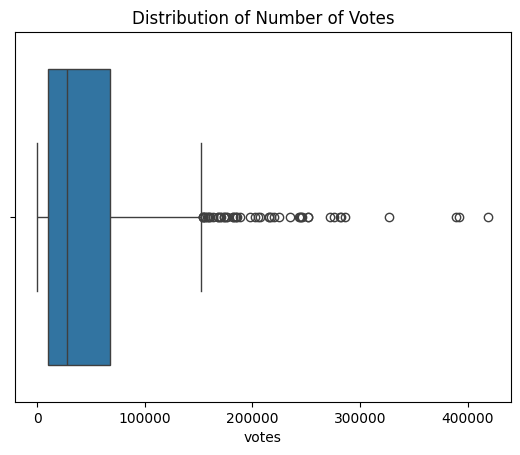

In [65]:
sns.boxplot(x=conversations_df['votes'])
plt.title("Distribution of Number of Votes")
plt.xlabel("votes")
plt.show()

do we drop outliers?

## plot relationship between variables


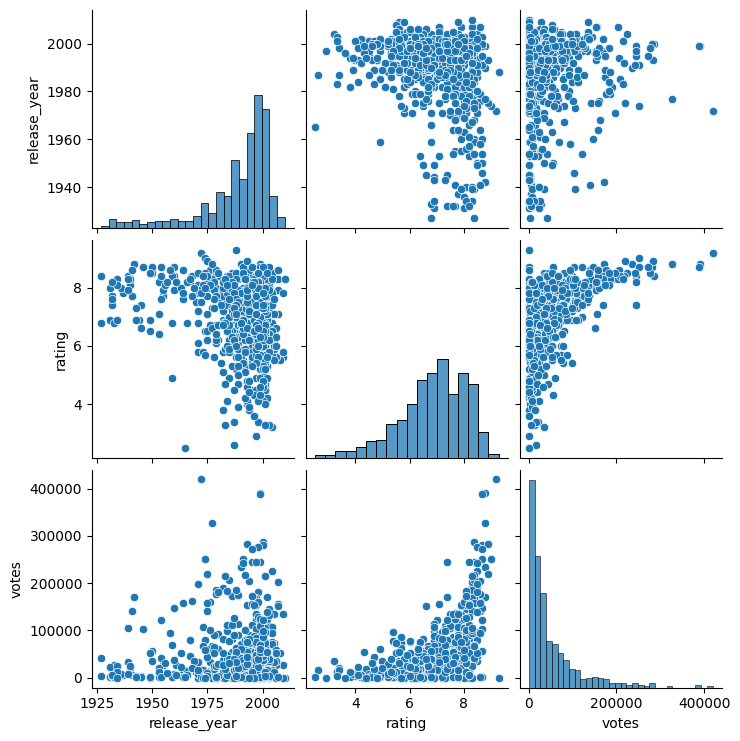

In [67]:
sns.pairplot(conversations_df[num_vars])
plt.show()

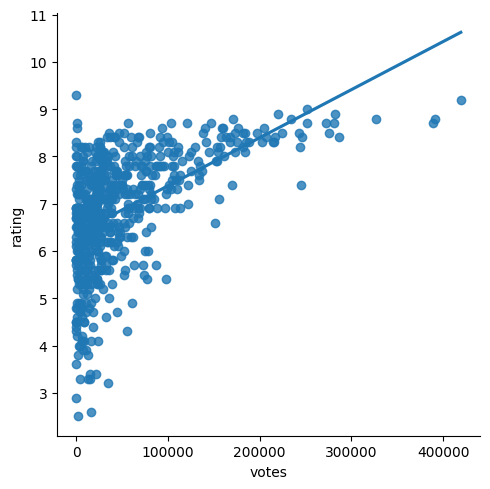

In [68]:
sns.lmplot(x='votes', y='rating', data=conversations_df, ci=False)

## speaker data


In [69]:
speakers_df.dtypes

speaker_id        object
character_name    object
movie_idx         object
movie_name        object
gender            object
credit_pos        object
dtype: object

In [70]:
speakers_df

,speaker_id,character_name,movie_idx,movie_name,gender,credit_pos
0,u0,BIANCA,m0,10 things i hate about you,f,4
1,u2,CAMERON,m0,10 things i hate about you,m,3
2,u3,CHASTITY,m0,10 things i hate about you,?,?
3,u4,JOEY,m0,10 things i hate about you,m,6
4,u5,KAT,m0,10 things i hate about you,f,2
...,...,...,...,...,...,...
9030,u9029,CREALOCK,m616,zulu dawn,?,?
9031,u9033,STUART SMITH,m616,zulu dawn,?,?
9032,u9028,COGHILL,m616,zulu dawn,?,?
9033,u9031,MELVILL,m616,zulu dawn,?,?


In [90]:
import numpy as np
np.unique(speakers_df['gender'].values)

array(['?', 'F', 'M', 'f', 'm'], dtype=object)

In [91]:
for idx in range(len(speakers_df)):
    row = speakers_df.iloc[idx]
    row['gender'] = row['gender'].lower()

In [92]:
np.unique(speakers_df['gender'].values)

array(['?', 'f', 'm'], dtype=object)

In [93]:
speakers_df.groupby('gender').count()

,speaker_id,character_name,movie_idx,movie_name,credit_pos
gender,,,,,
?,6020,6018,6020,6020,6020
f,966,966,966,966,966
m,2049,2049,2049,2049,2049


gender distribution data among each movie
